In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


## EDA (EXPLORARY DATA ANALYSIS)

### STEP 1 - Import and Inspect Data

In [2]:
df = pd.read_csv("../../datasets/online_retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [5]:
df.shape

(1067371, 8)

In [6]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### STEP 2 - Handling Missing Values

In [7]:
df = df[df["Customer ID"].notna()]
df["Customer ID"] = df["Customer ID"].astype(int)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


### STEP 3 - Explore Data Characteristics & Transformations

In [8]:
df = df[df["Price"] > 0]
df = df[df["Quantity"] > 0]

df["Total Price"] = df["Price"] * df["Quantity"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12


### STEP 4 - Handling Outliers

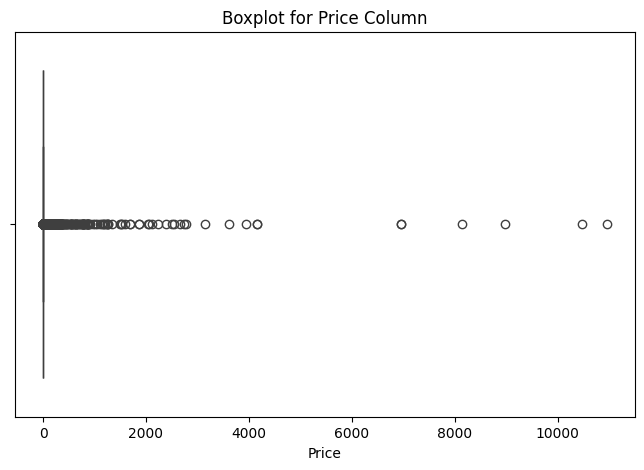

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot for Price Column')
plt.show()

In [10]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_mask = (df["Price"] >= lower) & (df["Price"] <= upper)
df = df[iqr_mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12


### STEP 5 - Visualizing Data Relationships

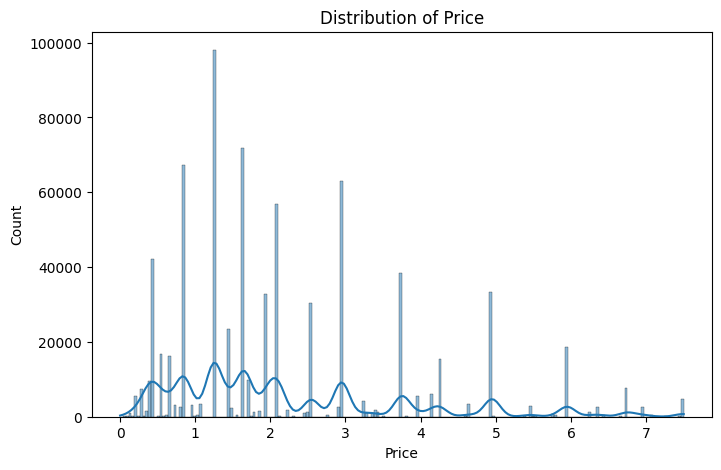

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

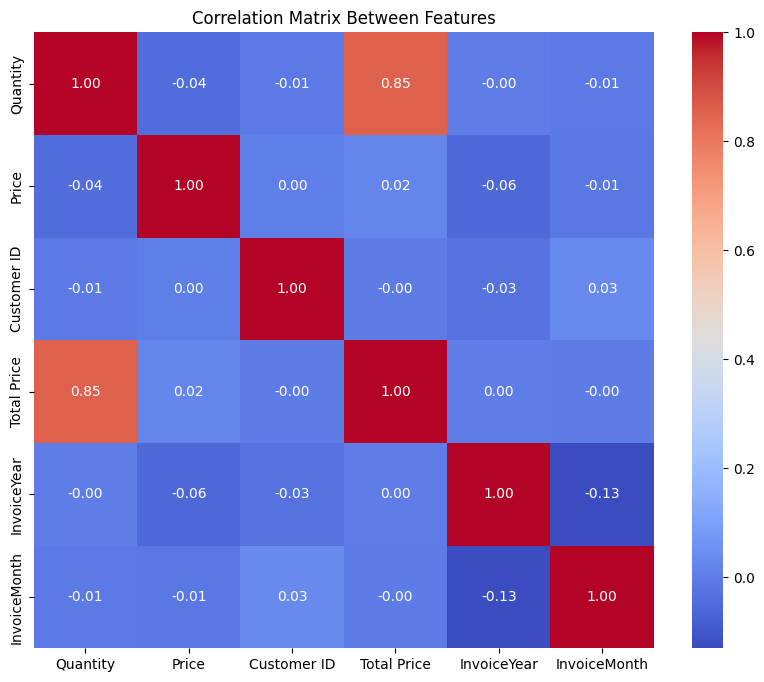

In [12]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show the correlation values on the heatmap
    cmap='coolwarm',
    fmt=".2f" # Format annotation to two decimal places
)
plt.title('Correlation Matrix Between Features')
plt.show()

## ANALYSIS

### Cohort Definition (Foundation)
##### How many customers entered the system in each cohort (month)?

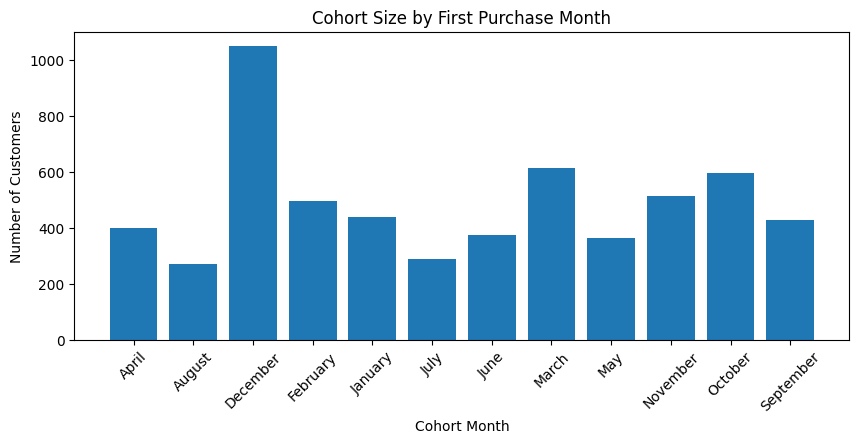

In [13]:
first_purchase_customers = (
    df.groupby(["Customer ID"])["InvoiceDate"].min().reset_index()
)
first_purchase_customers["MonthName"] = first_purchase_customers["InvoiceDate"].dt.month_name()
monthly_customers = (
    first_purchase_customers.groupby(["MonthName"])["Customer ID"].nunique().reset_index()
)
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(
    monthly_customers["MonthName"],
    monthly_customers["Customer ID"]
)

ax.set_title("Cohort Size by First Purchase Month")
ax.set_xlabel("Cohort Month")
ax.set_ylabel("Number of Customers")

plt.xticks(rotation=45)
plt.show()

### Cohort Index
##### How much time has passed since each customer’s first purchase?

In [14]:
first_purchase_customers = (
    df.groupby(["Customer ID"])["InvoiceDate"].min().reset_index()
)
first_purchase_customers["MonthName"] = first_purchase_customers["InvoiceDate"].dt.month_name()
first_purchase_customers.rename(columns={"InvoiceDate": "First Purchase Date"}, inplace=True)

data_with_first_purchase = df.merge(
    first_purchase_customers[["Customer ID", "First Purchase Date"]],
    on="Customer ID",
    how="left"
)
def define_cohort(x):
    if x == 1:
        return "First month"
    else:
        return f"{x} months later"
    
data_with_first_purchase["Cohort Index"] = (
    12 * (data_with_first_purchase["InvoiceDate"].dt.year - data_with_first_purchase["First Purchase Date"].dt.year) + 
    (data_with_first_purchase["InvoiceDate"].dt.month - data_with_first_purchase["First Purchase Date"].dt.month) + 1
)
data_with_first_purchase["Cohort Def"] = data_with_first_purchase["Cohort Index"].apply(define_cohort)
data_with_first_purchase.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth,First Purchase Date,Cohort Index,Cohort Def
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12,2009-12-01 07:45:00,1,First month
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,2009-12-01 07:45:00,1,First month
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,2009-12-01 07:45:00,1,First month
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12,2009-12-01 07:45:00,1,First month
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,2009-12-01 07:45:00,1,First month


### Cohort Customer Count Matrix
##### For each cohort, how many unique customers are active in each month after their first purchase?

In [15]:
data_with_first_purchase["Cohort Month"] = data_with_first_purchase["First Purchase Date"].dt.to_period("M")
unq_customer_each_cohort = (
    data_with_first_purchase.groupby(["Cohort Month", "Cohort Index"])["Customer ID"].nunique().reset_index()
)
cohort_matrix = unq_customer_each_cohort.pivot(
    index="Cohort Month",
    columns="Cohort Index",
    values="Customer ID"
)
unq_customer_each_cohort

,Cohort Month,Cohort Index,Customer ID
0,2009-12,1,944
1,2009-12,2,330
2,2009-12,3,315
3,2009-12,4,403
4,2009-12,5,356
...,...,...,...
320,2011-10,2,71
321,2011-10,3,35
322,2011-11,1,189
323,2011-11,2,27


### Retention Rate (%)
##### What percentage of each cohort remains active over time?

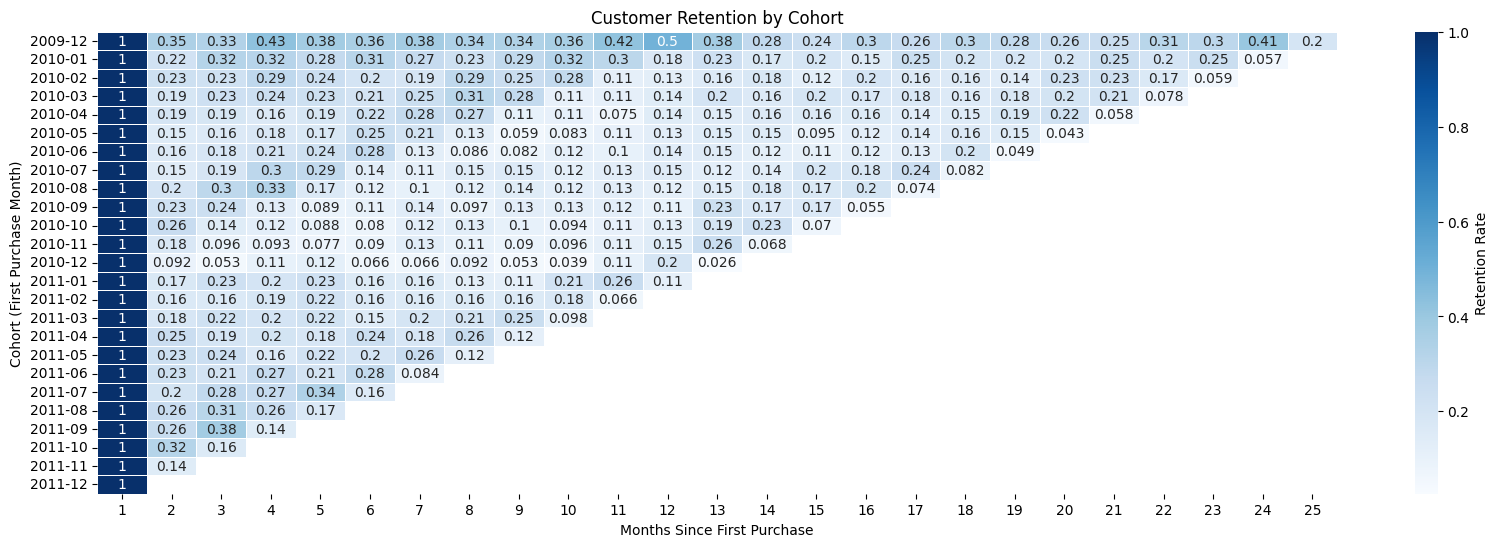

In [16]:
cohort_size = cohort_matrix.iloc[:, 0]
retention_matrix = cohort_matrix.divide(cohort_size, axis=0)

plt.figure(figsize=(20, 6))

sns.heatmap(
    retention_matrix,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Retention Rate"}
)

plt.title("Customer Retention by Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")

plt.show()

### Cohort Comparison & Insight (Executive Summary)
##### Which cohorts perform better or worse, and where should the business act?

#### Health Summary

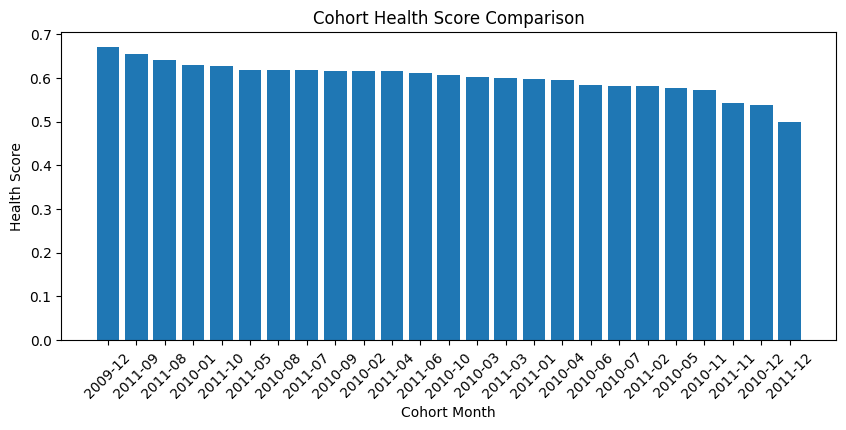

In [17]:
health_summary = retention_matrix.iloc[:, 0:3].copy()
health_summary.insert(0, "Cohort Size", cohort_size)
health_summary = health_summary.rename(
    columns={
        1: "Month 1 Retention",
        2: "Month 2 Retention",
        3: "Month 3 Retention"
    }
)
health_summary.fillna(0, inplace=True)
health_summary["Health Score"] = (
    health_summary["Month 1 Retention"] * 0.5 +
    health_summary["Month 2 Retention"] * 0.3 +
    health_summary["Month 3 Retention"] * 0.2
)

fig, ax = plt.subplots(figsize=(10, 4))

health_summary_sorted = health_summary.sort_values("Health Score", ascending=False)

ax.bar(
    health_summary_sorted.index.astype(str),
    health_summary_sorted["Health Score"]
)

ax.set_title("Cohort Health Score Comparison")
ax.set_xlabel("Cohort Month")
ax.set_ylabel("Health Score")

plt.xticks(rotation=45)
plt.show()

#### Best vs Worst Cohorts

In [18]:
ranked_cohorts = health_summary.sort_values(
    "Health Score",
    ascending=False
)
best_cohorts = ranked_cohorts.head(3)
best_cohorts

worst_cohorts = ranked_cohorts.tail(3)
worst_cohorts

Cohort Index,Cohort Size,Month 1 Retention,Month 2 Retention,Month 3 Retention,Health Score
Cohort Month,,,,,
2011-11,189.00,1.00,0.14,0.00,0.54
2010-12,76.00,1.00,0.09,0.05,0.54
2011-12,28.00,1.00,0.00,0.00,0.50


#### Retention Drop-Off Analysis (Where do we lose users?)

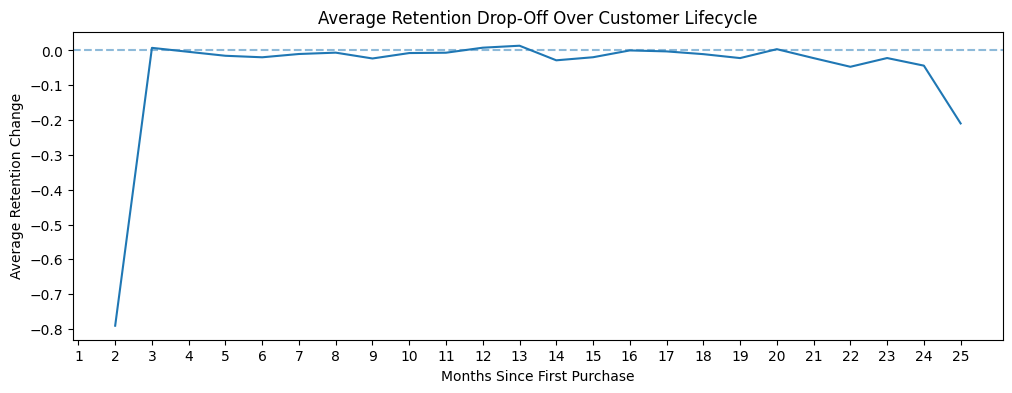

In [19]:
dropoff_matrix = retention_matrix.diff(axis=1)
avg_dropoff_by_month = dropoff_matrix.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(
    avg_dropoff_by_month.index.astype(str),
    avg_dropoff_by_month.values
)

ax.axhline(0, linestyle="--", alpha=0.5)

ax.set_title("Average Retention Drop-Off Over Customer Lifecycle")
ax.set_xlabel("Months Since First Purchase")
ax.set_ylabel("Average Retention Change")

plt.show()